In [14]:
# Constants for total numbers
total_male = 188
total_female = 188

# File paths
eval_file_path = '../GALS/eval/test_coco_image_id_tracking.txt'

In [16]:
def parse_file(file_path):
    data = {}
    with open(file_path, "r") as file:
        lines = file.readlines()

        # Process the file content
        for i in range(0, len(lines), 2):  # Process two lines at a time (key, values)
            key_line = lines[i].strip()  # e.g., "male_tp:"
            value_line = lines[i+1].strip()  # e.g., "./data/COCO/val2014/... , ..."

            # Extract the key and remove the trailing colon
            key = key_line[:-1]  # Remove the colon from the key

            # Split the values into a list
            values = value_line.split(", ")
            # Remove any empty strings caused by trailing commas
            values = [v for v in values if v]

            # Store the key-value pair
            data[key] = values

    return data

In [24]:
def calculate_male_percentages(file_path, total_males):
    """
    Calculate percentages for male categories based on a total number of males.

    Args:
        file_path (str): Path to the image ID tracking file.
        total_males (int): Total number of males.

    Returns:
        dict: A dictionary with category percentages for males.
    """
    # Parse the file to get the data
    data = parse_file(file_path)
    
    # Extract relevant keys for males
    male_counts = {}
    for key, image_ids in data.items():
        if "male" in key:
            # Count the number of items in this category
            male_counts[key] = len(image_ids)
    
    # Calculate percentages
    male_percentages = {key: (count / total_males) * 100 for key, count in male_counts.items()}
    
    return male_percentages

# Example usage
eval_file_path = '../GALS/eval/test_coco_image_id_tracking.txt'

total_males = 188

male_percentages = calculate_male_percentages(eval_file_path, total_males)
print("Male Percentages:")
for category, percentage in male_percentages.items():
    print(f"{category}: {percentage:.2f}%")


Male Percentages:
male_tp: 76.60%
male_fp: 35.64%
male_tn: 64.36%
male_fn: 23.40%
male_other: 14.36%
female_tp: 59.57%
female_fp: 9.04%
female_tn: 90.96%
female_fn: 40.43%
female_other: 4.79%
female_total: 100.00%
male_total: 100.00%


In [23]:
def calculate_male_percentages(file_path, total_males):
    """
    Calculate percentages for male categories based on a total number of males.

    Args:
        file_path (str): Path to the image ID tracking file.
        total_males (int): Total number of males.

    Returns:
        dict: A dictionary with category percentages for males.
    """
    # Parse the file to get the data
    data = parse_file(file_path)
    
    # Extract relevant keys for males
    male_counts = {}
    for key, image_ids in data.items():
        if "male" in key:
            # Count the number of items in this category
            male_counts[key] = len(image_ids)
            print(key, male_counts[key])
    
    # Calculate percentages
#     male_percentages = {key: (count / total_males) * 100 for key, count in male_counts.items()}
    
#     return male_percentages

# Example usage
eval_file_path = '../GALS/eval/test_coco_image_id_tracking.txt'

total = 188

male_percentages = calculate_male_percentages(eval_file_path, total)
print("Male Percentages:")
for category, percentage in male_percentages.items():
    print(f"{category}: {percentage:.2f}%")


male_tp 144
male_fp 67
male_tn 121
male_fn 44
male_other 27
female_tp 112
female_fp 17
female_tn 171
female_fn 76
female_other 9
female_total 188
male_total 188
Male Percentages:


AttributeError: 'NoneType' object has no attribute 'items'

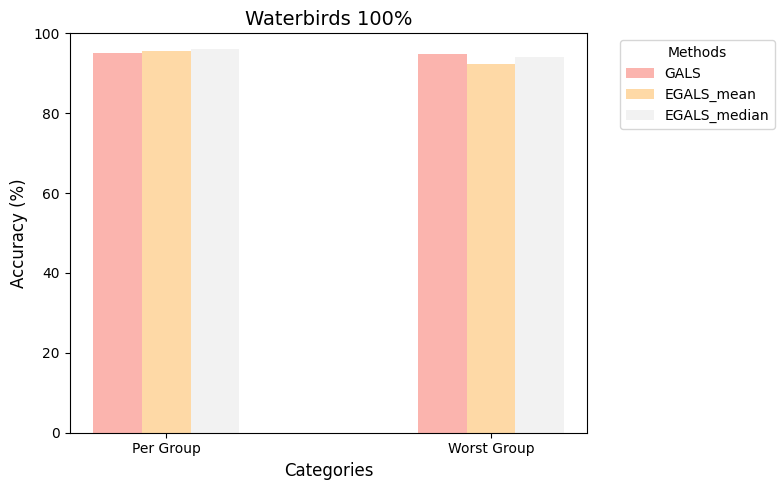

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm  # For colormap
# Data
categories = ['Per Group', 'Worst Group'] # worst-group is waterbirds on land
methods = ['GALS', 'EGALS_mean', 'EGALS_median']
data = {
    'Per Group': [95.10, 95.60,95.97],
    'Worst Group': [94.95, 92.43, 94.11],
}

# Plot settings
bar_width = 0.15
x = np.arange(len(categories))

# Colormap for the bars
cmap = cm.get_cmap('Pastel1', len(methods))  # 'Pastel1' colormap with the number of methods
colors = [cmap(i) for i in range(len(methods))]  # Get colors for the methods

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Loop through methods to create grouped bars with colors from colormap
for i, method in enumerate(methods):
    values = [data[cat][i] for cat in categories]
    ax.bar(x + i * bar_width, values, bar_width, label=method, color=colors[i])

# Add labels, title, and legend
ax.set_xlabel('Categories', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Waterbirds 100%', fontsize=14)
ax.set_xticks(x + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels(categories)
ax.set_ylim(0, 100)
ax.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add vertical dashed lines to separate groups
# ax.axvline(x=0.5 - bar_width / 2, color='black', linestyle='--', linewidth=1)

# Display the plot
plt.tight_layout()
plt.show()


### CUB

In [1]:
run4439 = {}
run4439['GALS'] = {
        "test_acc": 0.9683181664981463,
        "balanced_test_acc": 0.9556569487696687,
        "Land_on_Land_test_acc": 0.9788329519450801,
        "Land_on_Water_test_acc": 0.9553903345724907,
        "Water_on_Land_test_acc": 0.9327731092436975,
        "Water_on_Water_test_acc": 0.9556313993174061,
        "test_acc_Landbird": 0.9714285714285714,
        "test_acc_Waterbird": 0.9490291262135923
    }
run4439['median'] = {
    "test_acc": 0.9646107178968655,
    "balanced_test_acc": 0.9512920587424729,
    "Land_on_Land_test_acc": 0.9759725400457666,
    "Land_on_Water_test_acc": 0.9491945477075588,
    "Water_on_Land_test_acc": 0.9243697478991597,
    "Water_on_Water_test_acc": 0.9556313993174061,
    "test_acc_Landbird": 0.9675146771037182,
    "test_acc_Waterbird": 0.9466019417475728
}
run4439['mean'] = {
    "test_acc": 0.9605662285136501,
    "balanced_test_acc": 0.9512000938474916,
    "Land_on_Land_test_acc": 0.9696796338672768,
    "Land_on_Water_test_acc": 0.9467162329615861,
    "Water_on_Land_test_acc": 0.9327731092436975,
    "Water_on_Water_test_acc": 0.9556313993174061,
    "test_acc_Landbird": 0.962426614481409,
    "test_acc_Waterbird": 0.9490291262135923
}

In [2]:
run4456 = {}
run4456['GALS'] = {
    "test_acc": 0.974721941354904,
    "balanced_test_acc": 0.9651742716979701,
    "Land_on_Land_test_acc": 0.9799771167048055,
    "Land_on_Water_test_acc": 0.9702602230483272,
    "Water_on_Land_test_acc": 0.9411764705882353,
    "Water_on_Water_test_acc": 0.9692832764505119,
    "test_acc_Landbird": 0.9769080234833659,
    "test_acc_Waterbird": 0.9611650485436893
}
run4456['median'] = {
    "test_acc": 0.9743849005729693,
    "balanced_test_acc": 0.960022628977411,
    "Land_on_Land_test_acc": 0.9811212814645309,
    "Land_on_Water_test_acc": 0.9739776951672863,
    "Water_on_Land_test_acc": 0.9327731092436975,
    "Water_on_Water_test_acc": 0.9522184300341296,
    "test_acc_Landbird": 0.9788649706457926,
    "test_acc_Waterbird": 0.9466019417475728
}
run4456['mean'] = {
    "test_acc": 0.9666329625884732,
    "balanced_test_acc": 0.9578198027428731,
    "Land_on_Land_test_acc": 0.9759725400457666,
    "Land_on_Water_test_acc": 0.9516728624535316,
    "Water_on_Land_test_acc": 0.9411764705882353,
    "Water_on_Water_test_acc": 0.962457337883959,
    "test_acc_Landbird": 0.9682974559686889,
    "test_acc_Waterbird": 0.9563106796116505
}

In [3]:
run3804 = {}
run3804['GALS'] = {
    "test_acc": 0.9696663296258847,
    "balanced_test_acc": 0.9565254986014741,
    "Land_on_Land_test_acc": 0.9776887871853547,
    "Land_on_Water_test_acc": 0.9615861214374225,
    "Water_on_Land_test_acc": 0.9243697478991597,
    "Water_on_Water_test_acc": 0.962457337883959,
    "test_acc_Landbird": 0.9726027397260274,
    "test_acc_Waterbird": 0.9514563106796117
}
run3804['median'] = {
    "test_acc": 0.9625884732052579,
    "balanced_test_acc": 0.9546891888396887,
    "Land_on_Land_test_acc": 0.9696796338672768,
    "Land_on_Water_test_acc": 0.9504337050805453,
    "Water_on_Land_test_acc": 0.9327731092436975,
    "Water_on_Water_test_acc": 0.9658703071672355,
    "test_acc_Landbird": 0.963600782778865,
    "test_acc_Waterbird": 0.9563106796116505
}
run3804['mean'] = {
    "test_acc": 0.9710144927536232,
    "balanced_test_acc": 0.9569247355449451,
    "Land_on_Land_test_acc": 0.9811212814645309,
    "Land_on_Water_test_acc": 0.9615861214374225,
    "Water_on_Land_test_acc": 0.9327731092436975,
    "Water_on_Water_test_acc": 0.9522184300341296,
    "test_acc_Landbird": 0.9749510763209394,
    "test_acc_Waterbird": 0.9466019417475728
}

In [4]:
run5804 = {}
run5804['GALS'] = {
    "test_acc": 0.9716885743174924,
    "balanced_test_acc": 0.9609225774243139,
    "Land_on_Land_test_acc": 0.9794050343249427,
    "Land_on_Water_test_acc": 0.9640644361833953,
    "Water_on_Land_test_acc": 0.9411764705882353,
    "Water_on_Water_test_acc": 0.9590443686006825,
    "test_acc_Landbird": 0.974559686888454,
    "test_acc_Waterbird": 0.9538834951456311
}
run5804['median'] = {
    "test_acc": 0.961577350859454,
    "balanced_test_acc": 0.95838568201814,
    "Land_on_Land_test_acc": 0.9679633867276888,
    "Land_on_Water_test_acc": 0.9467162329615861,
    "Water_on_Land_test_acc": 0.9495798319327731,
    "Water_on_Water_test_acc": 0.9692832764505119,
    "test_acc_Landbird": 0.961252446183953,
    "test_acc_Waterbird": 0.9635922330097088
}
run5804['mean'] = {
    "test_acc": 0.9723626558813616,
    "balanced_test_acc": 0.9583738083989422,
    "Land_on_Land_test_acc": 0.9822654462242563,
    "Land_on_Water_test_acc": 0.9628252788104089,
    "Water_on_Land_test_acc": 0.9327731092436975,
    "Water_on_Water_test_acc": 0.9556313993174061,
    "test_acc_Landbird": 0.9761252446183953,
    "test_acc_Waterbird": 0.9490291262135923
}

In [5]:
run0 = {}
run0['GALS'] = {
    "test_acc": 0.948432760364004,
    "balanced_test_acc": 0.9510597160488481,
    "Land_on_Land_test_acc": 0.9553775743707094,
    "Land_on_Water_test_acc": 0.9231722428748451,
    "Water_on_Land_test_acc": 0.9495798319327731,
    "Water_on_Water_test_acc": 0.9761092150170648,
    "test_acc_Landbird": 0.9452054794520548,
    "test_acc_Waterbird": 0.9684466019417476
}
run0['median'] = {
    "test_acc": 0.9713515335355578,
    "balanced_test_acc": 0.9596926508742032,
    "Land_on_Land_test_acc": 0.9788329519450801,
    "Land_on_Water_test_acc": 0.966542750929368,
    "Water_on_Land_test_acc": 0.9411764705882353,
    "Water_on_Water_test_acc": 0.9522184300341296,
    "test_acc_Landbird": 0.9749510763209394,
    "test_acc_Waterbird": 0.9490291262135923
}
run0['mean'] = {
    "test_acc": 0.9696663296258847,
    "balanced_test_acc": 0.9560251923566313,
    "Land_on_Land_test_acc": 0.9794050343249427,
    "Land_on_Water_test_acc": 0.9578686493184635,
    "Water_on_Land_test_acc": 0.9243697478991597,
    "Water_on_Water_test_acc": 0.962457337883959,
    "test_acc_Landbird": 0.9726027397260274,
    "test_acc_Waterbird": 0.9514563106796117
}

In [18]:
runs_cub_gals = [run0['GALS'], run5804['GALS'], run3804['GALS'], run4439['GALS'], run4456['GALS']]

In [27]:
import numpy as np
averaged_metrics = {}
for key in runs_cub_gals[0].keys():
    averaged_metrics[key] = sum([metric[key]*100 for metric in runs_cub_gals]) / len(runs_cub_gals)
std_devs = {metric: np.std([run[metric]*100 for run in runs_cub_gals]) for metric in runs_cub_gals[0].keys()}

In [28]:
averaged_metrics

{'test_acc': 96.65655544320863,
 'balanced_test_acc': 95.78678025084551,
 'Land_on_Land_test_acc': 97.42562929061783,
 'Land_on_Water_test_acc': 95.48946716232962,
 'Water_on_Land_test_acc': 93.78151260504201,
 'Water_on_Water_test_acc': 96.45051194539249,
 'test_acc_Landbird': 96.81409001956948,
 'test_acc_Waterbird': 95.67961165048544}

In [29]:
std_devs

{'test_acc': 0.9319406171565169,
 'balanced_test_acc': 0.4811566004501584,
 'Land_on_Land_test_acc': 0.9469648373710988,
 'Land_on_Water_test_acc': 1.6562115932196928,
 'Water_on_Land_test_acc': 0.8569780695113893,
 'Water_on_Water_test_acc': 0.7351760828852586,
 'test_acc_Landbird': 1.1617345584651289,
 'test_acc_Waterbird': 0.710132953316888}

In [30]:
runs_cub_median = [run0['median'], run5804['median'], run3804['median'], run4439['median'], run4456['median']]

In [31]:
averaged_metrics_median = {}
for key in runs_cub_median[0].keys():
    averaged_metrics_median[key] = sum([metric[key] for metric in runs_cub_median]) / len(runs_cub_median)

averaged_metrics_median

std_devs_median = {metric: np.std([run[metric]*100 for run in runs_cub_median]) for metric in runs_cub_median[0].keys()}

In [37]:
averaged_metrics_median

{'test_acc': 0.966902595214021,
 'balanced_test_acc': 0.9568164418903832,
 'Land_on_Land_test_acc': 0.9747139588100687,
 'Land_on_Water_test_acc': 0.9573729863692689,
 'Water_on_Land_test_acc': 0.9361344537815126,
 'Water_on_Water_test_acc': 0.9590443686006825,
 'test_acc_Landbird': 0.9692367906066537,
 'test_acc_Waterbird': 0.9524271844660193}

In [32]:
std_devs_median

{'test_acc': 0.5059654601899631,
 'balanced_test_acc': 0.3348394930135865,
 'Land_on_Land_test_acc': 0.5109179304751952,
 'Land_on_Water_test_acc': 1.0848113322547355,
 'Water_on_Land_test_acc': 0.8569780695113893,
 'Water_on_Water_test_acc': 0.7159104765666594,
 'test_acc_Landbird': 0.6690813509622904,
 'test_acc_Waterbird': 0.6620476551934914}

In [33]:
runs_cub_mean = [run0['mean'], run5804['mean'], run3804['mean'], run4439['mean'], run4456['mean']]

In [34]:
averaged_metrics_mean = {}
for key in runs_cub_mean[0].keys():
    averaged_metrics_mean[key] = sum([metric[key] for metric in runs_cub_mean]) / len(runs_cub_mean)

averaged_metrics_mean

{'test_acc': 0.9680485338725987,
 'balanced_test_acc': 0.9560687265781767,
 'Land_on_Land_test_acc': 0.9776887871853548,
 'Land_on_Water_test_acc': 0.9561338289962826,
 'Water_on_Land_test_acc': 0.9327731092436975,
 'Water_on_Water_test_acc': 0.957679180887372,
 'test_acc_Landbird': 0.970880626223092,
 'test_acc_Waterbird': 0.9504854368932039}

In [39]:
std_devs_mean = {metric: np.std([run[metric]*100 for run in runs_cub_mean]) for metric in runs_cub_mean[0].keys()}
std_devs_mean

{'test_acc': 0.4195582425236355,
 'balanced_test_acc': 0.25619485233284356,
 'Land_on_Land_test_acc': 0.4533549829784631,
 'Land_on_Water_test_acc': 0.6100884076872937,
 'Water_on_Land_test_acc': 0.5314752370030871,
 'Water_on_Water_test_acc': 0.40955631399317743,
 'test_acc_Landbird': 0.5003665538785734,
 'test_acc_Waterbird': 0.329239319569187}

### COCO

In [1]:
# coco_runs/train_coco_GALS.out = train_coco_GALS_1712_r1.out
# coco_runs/train_coco_mean_1712_r1.out
# coco_runs/train_coco_median_1712_r1.out
run0 = {}
run0['GALS'] = {
    "test_acc": 0.6781914893617021,
    "balanced_test_acc": 0.6781914893617021,
    "test_acc_Man": 0.8191489361702128,
    "test_acc_Woman": 0.5372340425531915,
    "test_male_correct": 0.8191489361702128,
    "test_male_incorrect": 0.06914893617021277,
    "test_male_other": 0.11170212765957446,
    "test_female_correct": 0.5372340425531915,
    "test_female_incorrect": 0.425531914893617,
    "test_female_other": 0.03723404255319149,
    "test_all_correct": 0.5372340425531915,
    "test_all_incorrect": 0.425531914893617,
    "test_all_other": 0.03723404255319149,
    "test_ratio_numerator": 0.30319148936170215,
    "test_ratio_denominator": 0.6223404255319149,
    "test_ratio": 0.48717948717948717,
    "test_outcome_divergence": 0.13831587136930273
}
run0['mean'] = {
    "test_acc": 0.7180851063829787,
    "balanced_test_acc": 0.7180851063829787,
    "test_acc_Man": 0.6914893617021277,
    "test_acc_Woman": 0.7446808510638298,
    "test_male_correct": 0.6914893617021277,
    "test_male_incorrect": 0.18617021276595744,
    "test_male_other": 0.12234042553191489,
    "test_female_correct": 0.7446808510638298,
    "test_female_incorrect": 0.2393617021276596,
    "test_female_other": 0.015957446808510637,
    "test_all_correct": 0.7446808510638298,
    "test_all_incorrect": 0.2393617021276596,
    "test_all_other": 0.015957446808510637,
    "test_ratio_numerator": 0.4654255319148936,
    "test_ratio_denominator": 0.4654255319148936,
    "test_ratio": 1.0,
    "test_outcome_divergence": 0.03658684579520376
}
run0['median'] = {
    "test_acc": 0.6835106382978723,
    "balanced_test_acc": 0.6835106382978724,
    "test_acc_Man": 0.7287234042553191,
    "test_acc_Woman": 0.6382978723404256,
    "test_male_correct": 0.7287234042553191,
    "test_male_incorrect": 0.11702127659574468,
    "test_male_other": 0.15425531914893617,
    "test_female_correct": 0.6382978723404256,
    "test_female_incorrect": 0.30851063829787234,
    "test_female_other": 0.05319148936170213,
    "test_all_correct": 0.6382978723404256,
    "test_all_incorrect": 0.30851063829787234,
    "test_all_other": 0.05319148936170213,
    "test_ratio_numerator": 0.3776595744680851,
    "test_ratio_denominator": 0.5186170212765957,
    "test_ratio": 0.7282051282051282,
    "test_outcome_divergence": 0.0529200710217126
}


In [2]:
# coco_gals_1812_run1.out
# coco_runs/train_coco_mean_27.11.out
# coco_runs/train_coco_median_27.11.out
run01 = {}
run01['GALS'] = {
    "test_acc": 0.7047872340425532,
    "balanced_test_acc": 0.7047872340425532,
    "test_acc_Man": 0.723404255319149,
    "test_acc_Woman": 0.6861702127659575,
    "test_male_correct": 0.723404255319149,
    "test_male_incorrect": 0.10638297872340426,
    "test_male_other": 0.1702127659574468,
    "test_female_correct": 0.6861702127659575,
    "test_female_incorrect": 0.24468085106382978,
    "test_female_other": 0.06914893617021277,
    "test_all_correct": 0.6861702127659575,
    "test_all_incorrect": 0.24468085106382978,
    "test_all_other": 0.06914893617021277,
    "test_ratio_numerator": 0.3962765957446808,
    "test_ratio_denominator": 0.48404255319148937,
    "test_ratio": 0.8186813186813187,
    "test_outcome_divergence": 0.03643118019935607
}
run01['mean'] = {
    "test_acc": 0.6808510638297872,
    "balanced_test_acc": 0.6808510638297872,
    "test_acc_Man": 0.7659574468085106,
    "test_acc_Woman": 0.5957446808510638,
    "test_male_correct": 0.7659574468085106,
    "test_male_incorrect": 0.09042553191489362,
    "test_male_other": 0.14361702127659576,
    "test_female_correct": 0.5957446808510638,
    "test_female_incorrect": 0.35638297872340424,
    "test_female_other": 0.047872340425531915,
    "test_all_correct": 0.5957446808510638,
    "test_all_incorrect": 0.35638297872340424,
    "test_all_other": 0.047872340425531915,
    "test_ratio_numerator": 0.34308510638297873,
    "test_ratio_denominator": 0.5611702127659575,
    "test_ratio": 0.6113744075829384,
    "test_outcome_divergence": 0.08682744560140032
}
run01['median'] = {
    "test_acc": 0.7021276595744681,
    "balanced_test_acc": 0.7021276595744681,
    "test_acc_Man": 0.7712765957446809,
    "test_acc_Woman": 0.6329787234042553,
    "test_male_correct": 0.7712765957446809,
    "test_male_incorrect": 0.11702127659574468,
    "test_male_other": 0.11170212765957446,
    "test_female_correct": 0.6329787234042553,
    "test_female_incorrect": 0.3191489361702128,
    "test_female_other": 0.047872340425531915,
    "test_all_correct": 0.6329787234042553,
    "test_all_incorrect": 0.3191489361702128,
    "test_all_other": 0.047872340425531915,
    "test_ratio_numerator": 0.375,
    "test_ratio_denominator": 0.5452127659574468,
    "test_ratio": 0.6878048780487804,
    "test_outcome_divergence": 0.049502724377944285
}

In [3]:
# coco_gals_1812_run2.out
# coco_mean_1912_run3.out
# coco_median_1812_run2.out
run1703 = {}
run1703['GALS'] = {
    "test_acc": 0.6622340425531915,
    "balanced_test_acc": 0.6622340425531914,
    "test_acc_Man": 0.7127659574468085,
    "test_acc_Woman": 0.6117021276595744,
    "test_male_correct": 0.7127659574468085,
    "test_male_incorrect": 0.1702127659574468,
    "test_male_other": 0.11702127659574468,
    "test_female_correct": 0.6117021276595744,
    "test_female_incorrect": 0.35638297872340424,
    "test_female_other": 0.031914893617021274,
    "test_all_correct": 0.6117021276595744,
    "test_all_incorrect": 0.35638297872340424,
    "test_all_other": 0.031914893617021274,
    "test_ratio_numerator": 0.39095744680851063,
    "test_ratio_denominator": 0.5345744680851063,
    "test_ratio": 0.7313432835820896,
    "test_outcome_divergence": 0.0456910358098843
}
run1703['mean'] = {
    "test_acc": 0.6941489361702128,
    "balanced_test_acc": 0.6941489361702128,
    "test_acc_Man": 0.7659574468085106,
    "test_acc_Woman": 0.6223404255319149,
    "test_male_correct": 0.7659574468085106,
    "test_male_incorrect": 0.10106382978723404,
    "test_male_other": 0.13297872340425532,
    "test_female_correct": 0.6223404255319149,
    "test_female_incorrect": 0.31382978723404253,
    "test_female_other": 0.06382978723404255,
    "test_all_correct": 0.6223404255319149,
    "test_all_incorrect": 0.31382978723404253,
    "test_all_other": 0.06382978723404255,
    "test_ratio_numerator": 0.3617021276595745,
    "test_ratio_denominator": 0.5398936170212766,
    "test_ratio": 0.6699507389162561,
    "test_outcome_divergence": 0.0556111093496907
}
run1703['median'] = {
    "test_acc": 0.648936170212766,
    "balanced_test_acc": 0.648936170212766,
    "test_acc_Man": 0.6968085106382979,
    "test_acc_Woman": 0.601063829787234,
    "test_male_correct": 0.6968085106382979,
    "test_male_incorrect": 0.13297872340425532,
    "test_male_other": 0.1702127659574468,
    "test_female_correct": 0.601063829787234,
    "test_female_incorrect": 0.35106382978723405,
    "test_female_other": 0.047872340425531915,
    "test_all_correct": 0.601063829787234,
    "test_all_incorrect": 0.35106382978723405,
    "test_all_other": 0.047872340425531915,
    "test_ratio_numerator": 0.3670212765957447,
    "test_ratio_denominator": 0.523936170212766,
    "test_ratio": 0.700507614213198,
    "test_outcome_divergence": 0.06554660312915425
}

In [4]:
# coco_gals_1812_run3.out 
# coco_mean_1812_run1.out
# coco_median_1912_run3.out
run430 = {}
run430['GALS'] = {
    "test_acc": 0.7207446808510638,
    "balanced_test_acc": 0.7207446808510638,
    "test_acc_Man": 0.8404255319148937,
    "test_acc_Woman": 0.601063829787234,
    "test_male_correct": 0.8404255319148937,
    "test_male_incorrect": 0.0851063829787234,
    "test_male_other": 0.07446808510638298,
    "test_female_correct": 0.601063829787234,
    "test_female_incorrect": 0.3829787234042553,
    "test_female_other": 0.015957446808510637,
    "test_all_correct": 0.601063829787234,
    "test_all_incorrect": 0.3829787234042553,
    "test_all_other": 0.015957446808510637,
    "test_ratio_numerator": 0.34308510638297873,
    "test_ratio_denominator": 0.6117021276595744,
    "test_ratio": 0.5608695652173913,
    "test_outcome_divergence": 0.10316701205180268
}
run430['mean'] = {
    "test_acc": 0.7287234042553191,
    "balanced_test_acc": 0.7287234042553192,
    "test_acc_Man": 0.8404255319148937,
    "test_acc_Woman": 0.6170212765957447,
    "test_male_correct": 0.8404255319148937,
    "test_male_incorrect": 0.0851063829787234,
    "test_male_other": 0.07446808510638298,
    "test_female_correct": 0.6170212765957447,
    "test_female_incorrect": 0.3617021276595745,
    "test_female_other": 0.02127659574468085,
    "test_all_correct": 0.6170212765957447,
    "test_all_incorrect": 0.3617021276595745,
    "test_all_other": 0.02127659574468085,
    "test_ratio_numerator": 0.35106382978723405,
    "test_ratio_denominator": 0.601063829787234,
    "test_ratio": 0.584070796460177,
    "test_outcome_divergence": 0.09015822204800092
}
run430['median'] = {
    "test_acc": 0.7367021276595744,
    "balanced_test_acc": 0.7367021276595744,
    "test_acc_Man": 0.8351063829787234,
    "test_acc_Woman": 0.6382978723404256,
    "test_male_correct": 0.8351063829787234,
    "test_male_incorrect": 0.09042553191489362,
    "test_male_other": 0.07446808510638298,
    "test_female_correct": 0.6382978723404256,
    "test_female_incorrect": 0.34574468085106386,
    "test_female_other": 0.015957446808510637,
    "test_all_correct": 0.6382978723404256,
    "test_all_incorrect": 0.34574468085106386,
    "test_all_other": 0.015957446808510637,
    "test_ratio_numerator": 0.36436170212765956,
    "test_ratio_denominator": 0.5904255319148937,
    "test_ratio": 0.6171171171171171,
    "test_outcome_divergence": 0.08183044928861478
}

In [5]:
# coco_gals_1812_run4.out
# coco_mean_1812_run2.out
# coco_median_1812_run1.out
run933 = {}
run933['GALS'] = {
    "test_acc": 0.6808510638297872,
    "balanced_test_acc": 0.6808510638297873,
    "test_acc_Man": 0.5904255319148937,
    "test_acc_Woman": 0.7712765957446809,
    "test_male_correct": 0.5904255319148937,
    "test_male_incorrect": 0.25,
    "test_male_other": 0.1595744680851064,
    "test_female_correct": 0.7712765957446809,
    "test_female_incorrect": 0.19148936170212766,
    "test_female_other": 0.03723404255319149,
    "test_all_correct": 0.7712765957446809,
    "test_all_incorrect": 0.19148936170212766,
    "test_all_other": 0.03723404255319149,
    "test_ratio_numerator": 0.5106382978723404,
    "test_ratio_denominator": 0.39095744680851063,
    "test_ratio": 1.3061224489795917,
    "test_outcome_divergence": 0.04103752736806468
}
run933['mean'] = {
    "test_acc": 0.6888297872340425,
    "balanced_test_acc": 0.6888297872340425,
    "test_acc_Man": 0.6861702127659575,
    "test_acc_Woman": 0.6914893617021277,
    "test_male_correct": 0.6861702127659575,
    "test_male_incorrect": 0.13297872340425532,
    "test_male_other": 0.18085106382978725,
    "test_female_correct": 0.6914893617021277,
    "test_female_incorrect": 0.2393617021276596,
    "test_female_other": 0.06914893617021277,
    "test_all_correct": 0.6914893617021277,
    "test_all_incorrect": 0.2393617021276596,
    "test_all_other": 0.06914893617021277,
    "test_ratio_numerator": 0.4122340425531915,
    "test_ratio_denominator": 0.4627659574468085,
    "test_ratio": 0.8908045977011494,
    "test_outcome_divergence": 0.0297780450399842
}
run933['median'] = {
    "test_acc": 0.7074468085106383,
    "balanced_test_acc": 0.7074468085106382,
    "test_acc_Man": 0.7287234042553191,
    "test_acc_Woman": 0.6861702127659575,
    "test_male_correct": 0.7287234042553191,
    "test_male_incorrect": 0.10638297872340426,
    "test_male_other": 0.16489361702127658,
    "test_female_correct": 0.6861702127659575,
    "test_female_incorrect": 0.2872340425531915,
    "test_female_other": 0.026595744680851064,
    "test_all_correct": 0.6861702127659575,
    "test_all_incorrect": 0.2872340425531915,
    "test_all_other": 0.026595744680851064,
    "test_ratio_numerator": 0.3962765957446808,
    "test_ratio_denominator": 0.5079787234042553,
    "test_ratio": 0.7801047120418848,
    "test_outcome_divergence": 0.0716727326447194
}

In [6]:
runs_coco_gals = [run0['GALS'], run01['GALS'], run1703['GALS'], run430['GALS'], run933['GALS']]

In [8]:
import numpy as np
averaged_metrics_coco = {}
for key in runs_coco_gals[0].keys():
    averaged_metrics_coco[key] = sum([metric[key]*100 for metric in runs_coco_gals]) / len(runs_coco_gals)
std_devs_gals_coco = {metric: np.std([run[metric]*100 for run in runs_coco_gals]) for metric in runs_coco_gals[0].keys()}

In [10]:
averaged_metrics_coco

{'test_acc': 68.93617021276596,
 'balanced_test_acc': 68.93617021276596,
 'test_acc_Man': 73.72340425531914,
 'test_acc_Woman': 64.14893617021275,
 'test_male_correct': 73.72340425531914,
 'test_male_incorrect': 13.617021276595745,
 'test_male_other': 12.659574468085108,
 'test_female_correct': 64.14893617021275,
 'test_female_incorrect': 32.02127659574468,
 'test_female_other': 3.829787234042553,
 'test_all_correct': 64.14893617021275,
 'test_all_incorrect': 32.02127659574468,
 'test_all_other': 3.829787234042553,
 'test_ratio_numerator': 38.88297872340426,
 'test_ratio_denominator': 52.87234042553191,
 'test_ratio': 78.08392207279758,
 'test_outcome_divergence': 7.29285253596821}

In [11]:
std_devs_gals_coco

{'test_acc': 2.0765129038237347,
 'balanced_test_acc': 2.0765129038237373,
 'test_acc_Man': 8.910804932498689,
 'test_acc_Woman': 8.028920112388597,
 'test_male_correct': 8.910804932498689,
 'test_male_incorrect': 6.648723400850955,
 'test_male_other': 3.4701077511276788,
 'test_female_correct': 8.028920112388597,
 'test_female_incorrect': 8.788032522580162,
 'test_female_other': 1.728518809497013,
 'test_all_correct': 8.028920112388597,
 'test_all_incorrect': 8.788032522580162,
 'test_all_other': 1.728518809497013,
 'test_ratio_numerator': 6.974781580066383,
 'test_ratio_denominator': 8.562673372430684,
 'test_ratio': 28.789825650986977,
 'test_outcome_divergence': 4.069605359058804}

In [12]:
runs_coco_median = [run0['median'], run01['median'], run1703['median'], run430['median'], run933['median']]

In [13]:
averaged_metrics_coco_med = {}
for key in runs_coco_median[0].keys():
    averaged_metrics_coco_med[key] = sum([metric[key]*100 for metric in runs_coco_median]) / len(runs_coco_median)
std_devs_gals_coco_med = {metric: np.std([run[metric]*100 for run in runs_coco_median]) for metric in runs_coco_median[0].keys()}

In [14]:
averaged_metrics_coco_med

{'test_acc': 69.57446808510637,
 'balanced_test_acc': 69.57446808510639,
 'test_acc_Man': 75.2127659574468,
 'test_acc_Woman': 63.93617021276596,
 'test_male_correct': 75.2127659574468,
 'test_male_incorrect': 11.27659574468085,
 'test_male_other': 13.510638297872338,
 'test_female_correct': 63.93617021276596,
 'test_female_incorrect': 32.234042553191486,
 'test_female_other': 3.8297872340425534,
 'test_all_correct': 63.93617021276596,
 'test_all_incorrect': 32.234042553191486,
 'test_all_other': 3.8297872340425534,
 'test_ratio_numerator': 37.6063829787234,
 'test_ratio_denominator': 53.723404255319146,
 'test_ratio': 70.27478899252216,
 'test_outcome_divergence': 6.429451609242906}

In [15]:
std_devs_gals_coco_med

{'test_acc': 2.8968614477000214,
 'balanced_test_acc': 2.896861447700019,
 'test_acc_Man': 4.776583898009288,
 'test_acc_Woman': 2.7205769899030705,
 'test_male_correct': 4.776583898009288,
 'test_male_incorrect': 1.4032878679013738,
 'test_male_other': 3.6636543314303327,
 'test_female_correct': 2.7205769899030705,
 'test_female_incorrect': 2.3692614309914983,
 'test_female_other': 1.4430489325798443,
 'test_all_correct': 2.7205769899030705,
 'test_all_incorrect': 2.3692614309914983,
 'test_all_other': 1.4430489325798443,
 'test_ratio_numerator': 1.1233357490395144,
 'test_ratio_denominator': 2.9231131200072547,
 'test_ratio': 5.327868354182103,
 'test_outcome_divergence': 1.193054782725891}

In [16]:
runs_coco_mean = [run0['mean'], run01['mean'], run1703['mean'], run430['mean'], run933['mean']]

In [17]:
averaged_metrics_coco_mean = {}
for key in runs_coco_mean[0].keys():
    averaged_metrics_coco_mean[key] = sum([metric[key]*100 for metric in runs_coco_mean]) / len(runs_coco_mean)
std_devs_gals_coco_mean = {metric: np.std([run[metric]*100 for run in runs_coco_mean]) for metric in runs_coco_mean[0].keys()}

In [18]:
averaged_metrics_coco_mean

{'test_acc': 70.2127659574468,
 'balanced_test_acc': 70.2127659574468,
 'test_acc_Man': 75.0,
 'test_acc_Woman': 65.42553191489363,
 'test_male_correct': 75.0,
 'test_male_incorrect': 11.914893617021274,
 'test_male_other': 13.085106382978726,
 'test_female_correct': 65.42553191489363,
 'test_female_incorrect': 30.212765957446813,
 'test_female_other': 4.361702127659575,
 'test_all_correct': 65.42553191489363,
 'test_all_incorrect': 30.212765957446813,
 'test_all_other': 4.361702127659575,
 'test_ratio_numerator': 38.67021276595746,
 'test_ratio_denominator': 52.6063829787234,
 'test_ratio': 75.12401081321042,
 'test_outcome_divergence': 5.979233356685598}

In [19]:
std_devs_gals_coco_mean

{'test_acc': 1.8194288698390522,
 'balanced_test_acc': 1.8194288698390522,
 'test_acc_Man': 5.689251896647204,
 'test_acc_Woman': 5.5482573661299135,
 'test_male_correct': 5.689251896647204,
 'test_male_incorrect': 3.740084219414243,
 'test_male_other': 3.4406301337864327,
 'test_female_correct': 5.5482573661299135,
 'test_female_incorrect': 5.386803787732835,
 'test_female_other': 2.164573398869767,
 'test_all_correct': 5.5482573661299135,
 'test_all_incorrect': 5.386803787732835,
 'test_all_other': 2.164573398869767,
 'test_ratio_numerator': 4.614495828573685,
 'test_ratio_denominator': 5.428138714599543,
 'test_ratio': 16.46060053906179,
 'test_outcome_divergence': 2.4939203196648094}

#### Waterbirds 95

In [1]:
run933 = {}
run933['GALS'] = {
    "test_acc": 0.9686552072800809,
    "balanced_test_acc": 0.9500874607067706,
    "Land_on_Land_test_acc": 0.9731121281464531,
    "Land_on_Water_test_acc": 0.9776951672862454,
    "Water_on_Land_test_acc": 0.907563025210084,
    "Water_on_Water_test_acc": 0.9419795221843004,
    "test_acc_Landbird": 0.974559686888454,
    "test_acc_Waterbird": 0.9320388349514563
}

run933['mean'] = {
    "test_acc": 0.964273677114931,
    "balanced_test_acc": 0.9568991338609347,
    "Land_on_Land_test_acc": 0.9679633867276888,
    "Land_on_Water_test_acc": 0.9628252788104089,
    "Water_on_Land_test_acc": 0.9411764705882353,
    "Water_on_Water_test_acc": 0.9556313993174061,
    "test_acc_Landbird": 0.9663405088062622,
    "test_acc_Waterbird": 0.9514563106796117
}

run933['median'] = {
    "test_acc": 0.9686552072800809,
    "balanced_test_acc": 0.9524651114099608,
    "Land_on_Land_test_acc": 0.9748283752860412,
    "Land_on_Water_test_acc": 0.9702602230483272,
    "Water_on_Land_test_acc": 0.9159663865546218,
    "Water_on_Water_test_acc": 0.9488054607508533,
    "test_acc_Landbird": 0.9733855185909981,
    "test_acc_Waterbird": 0.9393203883495146
}


In [22]:
run430 = {}
run430['GALS'] = {
    "test_acc": 0.9710144927536232,
    "balanced_test_acc": 0.9537997930712824,
    "Land_on_Land_test_acc": 0.9776887871853547,
    "Land_on_Water_test_acc": 0.9727385377942999,
    "Water_on_Land_test_acc": 0.9159663865546218,
    "Water_on_Water_test_acc": 0.9488054607508533,
    "test_acc_Landbird": 0.9761252446183953,
    "test_acc_Waterbird": 0.9393203883495146
}

run430['mean'] = {
    "test_acc": 0.964273677114931,
    "balanced_test_acc": 0.9568991338609347,
    "Land_on_Land_test_acc": 0.9679633867276888,
    "Land_on_Water_test_acc": 0.9628252788104089,
    "Water_on_Land_test_acc": 0.9411764705882353,
    "Water_on_Water_test_acc": 0.9556313993174061,
    "test_acc_Landbird": 0.9663405088062622,
    "test_acc_Waterbird": 0.9514563106796117
}

run430['median'] = {
    "test_acc": 0.9696663296258847,
    "balanced_test_acc": 0.9551855304325885,
    "Land_on_Land_test_acc": 0.9748283752860412,
    "Land_on_Water_test_acc": 0.9727385377942999,
    "Water_on_Land_test_acc": 0.9243697478991597,
    "Water_on_Water_test_acc": 0.9488054607508533,
    "test_acc_Landbird": 0.9741682974559687,
    "test_acc_Waterbird": 0.941747572815534
}


In [11]:
run1703 = {}
run1703['GALS'] = {
    "test_acc": 0.965958881024604,
    "balanced_test_acc": 0.9529020821621126,
    "Land_on_Land_test_acc": 0.9691075514874142,
    "Land_on_Water_test_acc": 0.9727385377942999,
    "Water_on_Land_test_acc": 0.9243697478991597,
    "Water_on_Water_test_acc": 0.9453924914675768,
    "test_acc_Landbird": 0.9702544031311154,
    "test_acc_Waterbird": 0.9393203883495146
}

run1703['mean'] = {
    "test_acc": 0.9609032692955848,
    "balanced_test_acc": 0.9562222963698613,
    "Land_on_Land_test_acc": 0.9633867276887872,
    "Land_on_Water_test_acc": 0.9578686493184635,
    "Water_on_Land_test_acc": 0.9411764705882353,
    "Water_on_Water_test_acc": 0.962457337883959,
    "test_acc_Landbird": 0.9616438356164384,
    "test_acc_Waterbird": 0.9563106796116505
}

run1703['median'] = {
    "test_acc": 0.967644084934277,
    "balanced_test_acc": 0.9534935631213898,
    "Land_on_Land_test_acc": 0.9742562929061785,
    "Land_on_Water_test_acc": 0.966542750929368,
    "Water_on_Land_test_acc": 0.9243697478991597,
    "Water_on_Water_test_acc": 0.9488054607508533,
    "test_acc_Landbird": 0.9718199608610567,
    "test_acc_Waterbird": 0.941747572815534
}


In [4]:
seed0 = {}
seed0['GALS'] = {
    "test_acc": 0.9706774519716885,
    "balanced_test_acc": 0.9520203368554886,
    "Land_on_Land_test_acc": 0.9776887871853547,
    "Land_on_Water_test_acc": 0.9776951672862454,
    "Water_on_Land_test_acc": 0.9243697478991597,
    "Water_on_Water_test_acc": 0.9283276450511946,
    "test_acc_Landbird": 0.9776908023483366,
    "test_acc_Waterbird": 0.9271844660194175
}

seed0['mean'] = {
    "test_acc": 0.9696663296258847,
    "balanced_test_acc": 0.9544260852858946,
    "Land_on_Land_test_acc": 0.9742562929061785,
    "Land_on_Water_test_acc": 0.9789343246592317,
    "Water_on_Land_test_acc": 0.9327731092436975,
    "Water_on_Water_test_acc": 0.931740614334471,
    "test_acc_Landbird": 0.9757338551859099,
    "test_acc_Waterbird": 0.9320388349514563
}

seed0['median'] = {
    "test_acc": 0.967644084934277,
    "balanced_test_acc": 0.9566619108332548,
    "Land_on_Land_test_acc": 0.971395881006865,
    "Land_on_Water_test_acc": 0.9702602230483272,
    "Water_on_Land_test_acc": 0.9327731092436975,
    "Water_on_Water_test_acc": 0.9522184300341296,
    "test_acc_Landbird": 0.9710371819960861,
    "test_acc_Waterbird": 0.9466019417475728
}


In [5]:
seed5804 = {}
seed5804['GALS'] = {
    "test_acc": 0.970340411189754,
    "balanced_test_acc": 0.960054286097981,
    "Land_on_Land_test_acc": 0.9725400457665904,
    "Land_on_Water_test_acc": 0.9776951672862454,
    "Water_on_Land_test_acc": 0.9411764705882353,
    "Water_on_Water_test_acc": 0.9488054607508533,
    "test_acc_Landbird": 0.9741682974559687,
    "test_acc_Waterbird": 0.9466019417475728
}

seed5804['mean'] = {
    "test_acc": 0.970340411189754,
    "balanced_test_acc": 0.9568859383861161,
    "Land_on_Land_test_acc": 0.9754004576659039,
    "Land_on_Water_test_acc": 0.9739776951672863,
    "Water_on_Land_test_acc": 0.9327731092436975,
    "Water_on_Water_test_acc": 0.9453924914675768,
    "test_acc_Landbird": 0.9749510763209394,
    "test_acc_Waterbird": 0.941747572815534
}

seed5804['median'] = {
    "test_acc": 0.9716885743174924,
    "balanced_test_acc": 0.9560375773142719,
    "Land_on_Land_test_acc": 0.9788329519450801,
    "Land_on_Water_test_acc": 0.9739776951672863,
    "Water_on_Land_test_acc": 0.9327731092436975,
    "Water_on_Water_test_acc": 0.9385665529010239,
    "test_acc_Landbird": 0.9772994129158513,
    "test_acc_Waterbird": 0.9368932038834952
}


In [23]:
runs_w95_gals = [seed0['GALS'],run430['GALS'],run933['GALS'],run1703['GALS'],seed5804['GALS']]
runs_w95_mean = [seed0['mean'],run430['mean'],run933['mean'],run1703['mean'],seed5804['mean']]
runs_w95_median = [seed0['median'],run430['median'],run933['median'],run1703['median'],seed5804['median']]

In [24]:
import numpy as np
averaged_metrics = {}
for key in runs_w95_gals[0].keys():
    averaged_metrics[key] = sum([metric[key]*100 for metric in runs_w95_gals]) / len(runs_w95_gals)
std_devs = {metric: np.std([run[metric]*100 for run in runs_w95_gals]) for metric in runs_w95_gals[0].keys()}

In [25]:
averaged_metrics

{'test_acc': 96.93292888439501,
 'balanced_test_acc': 95.37727917787271,
 'Land_on_Land_test_acc': 97.40274599542334,
 'Land_on_Water_test_acc': 97.57125154894672,
 'Water_on_Land_test_acc': 92.26890756302521,
 'Water_on_Water_test_acc': 94.26621160409556,
 'test_acc_Landbird': 97.45596868884542,
 'test_acc_Waterbird': 93.68932038834951}

In [26]:
std_devs

{'test_acc': 0.1870500428110704,
 'balanced_test_acc': 0.3372500513179942,
 'Land_on_Land_test_acc': 0.32883542021051687,
 'Land_on_Water_test_acc': 0.24282426198594362,
 'Water_on_Land_test_acc': 1.114831862304332,
 'Water_on_Water_test_acc': 0.7601043498744027,
 'test_acc_Landbird': 0.2487710149834958,
 'test_acc_Waterbird': 0.6691285801985529}

In [27]:
import numpy as np
averaged_metrics = {}
for key in runs_w95_mean[0].keys():
    averaged_metrics[key] = sum([metric[key]*100 for metric in runs_w95_mean]) / len(runs_w95_mean)
std_devs = {metric: np.std([run[metric]*100 for run in runs_w95_mean]) for metric in runs_w95_mean[0].keys()}

In [28]:
averaged_metrics

{'test_acc': 96.5891472868217,
 'balanced_test_acc': 95.62665175527484,
 'Land_on_Land_test_acc': 96.97940503432494,
 'Land_on_Water_test_acc': 96.728624535316,
 'Water_on_Land_test_acc': 93.78151260504201,
 'Water_on_Water_test_acc': 95.01706484641639,
 'test_acc_Landbird': 96.90019569471625,
 'test_acc_Waterbird': 94.66019417475728}

In [29]:
std_devs

{'test_acc': 0.3582158478081966,
 'balanced_test_acc': 0.09563718311900707,
 'Land_on_Land_test_acc': 0.4451962576280023,
 'Land_on_Water_test_acc': 0.7860595552492525,
 'Water_on_Land_test_acc': 0.4116789483669192,
 'Water_on_Water_test_acc': 1.0706066308094309,
 'test_acc_Landbird': 0.5459286348074401,
 'test_acc_Waterbird': 0.8683759135921494}

In [30]:
import numpy as np
averaged_metrics = {}
for key in runs_w95_median[0].keys():
    averaged_metrics[key] = sum([metric[key]*100 for metric in runs_w95_median]) / len(runs_w95_median)
std_devs = {metric: np.std([run[metric]*100 for run in runs_w95_median]) for metric in runs_w95_median[0].keys()}

In [31]:
averaged_metrics

{'test_acc': 96.90596562184024,
 'balanced_test_acc': 95.47687386222931,
 'Land_on_Land_test_acc': 97.48283752860411,
 'Land_on_Water_test_acc': 97.07558859975218,
 'Water_on_Land_test_acc': 92.60504201680672,
 'Water_on_Water_test_acc': 94.74402730375425,
 'test_acc_Landbird': 97.35420743639921,
 'test_acc_Waterbird': 94.12621359223301}

In [32]:
std_devs

{'test_acc': 0.1513309357643708,
 'balanced_test_acc': 0.1568473076036142,
 'Land_on_Land_test_acc': 0.23725905438590142,
 'Land_on_Water_test_acc': 0.255158119974896,
 'Water_on_Land_test_acc': 0.6288499809704081,
 'Water_on_Water_test_acc': 0.4629576780290312,
 'test_acc_Landbird': 0.21805695932969685,
 'test_acc_Waterbird': 0.3220024068306206}

### MEAT

In [1]:
run0 = {}  # Ensure run0 exists
run0['GALS'] = {
    'test_acc': 0.85832,
    'test_acc_white_meat': 0.8526666666666667,
    'test_acc_red_meat': 0.8203076923076923,
    'test_acc_fish': 0.8896842105263157,
    'balanced_test_acc': 0.8542195231668916
}
run0['mean'] = {
    'test_acc': 0.86,
    'test_acc_white_meat': 0.858,
    'test_acc_red_meat': 0.8212307692307692,
    'test_acc_fish': 0.888421052631579,
    'balanced_test_acc': 0.8558839406207827
}
run0['median'] = {
    'test_acc': 0.85472,
    'test_acc_white_meat': 0.8508888888888889,
    'test_acc_red_meat': 0.8181538461538461,
    'test_acc_fish': 0.8833684210526316,
    'balanced_test_acc': 0.8508037186984555
}



In [2]:
run430 = {}  # Ensure run430 exists
run430['GALS'] = {
    'test_acc': 0.86208,
    'test_acc_white_meat': 0.858,
    'test_acc_red_meat': 0.815076923076923,
    'test_acc_fish': 0.8981052631578947,
    'balanced_test_acc': 0.8570607287449392
}
run430['mean'] = {
    'test_acc': 0.8624,
    'test_acc_white_meat': 0.8602222222222222,
    'test_acc_red_meat': 0.8061538461538461,
    'test_acc_fish': 0.9029473684210526,
    'balanced_test_acc': 0.8564411455990403
}
run430['median'] = {
    'test_acc': 0.85856,
    'test_acc_white_meat': 0.8502222222222222,
    'test_acc_red_meat': 0.8043076923076923,
    'test_acc_fish': 0.903578947368421,
    'balanced_test_acc': 0.8527029539661118
}


In [3]:
run1703 = {}  # Ensure run1703 exists
run1703['GALS'] = {
    'test_acc': 0.85648,
    'test_acc_white_meat': 0.8526666666666667,
    'test_acc_red_meat': 0.812923076923077,
    'test_acc_fish': 0.8898947368421053,
    'balanced_test_acc': 0.8518281601439496
}
run1703['mean'] = {
    'test_acc': 0.85552,
    'test_acc_white_meat': 0.8546666666666667,
    'test_acc_red_meat': 0.8046153846153846,
    'test_acc_fish': 0.8911578947368421,
    'balanced_test_acc': 0.8501466486729644
}
run1703['median'] = {
    'test_acc': 0.85496,
    'test_acc_white_meat': 0.8495555555555555,
    'test_acc_red_meat': 0.8141538461538461,
    'test_acc_fish': 0.888,
    'balanced_test_acc': 0.8505698005698005
}


In [4]:
run5804 = {}  # Ensure run5804 exists
run5804['GALS'] = {
    'test_acc': 0.85448,
    'test_acc_white_meat': 0.844,
    'test_acc_red_meat': 0.8135384615384615,
    'test_acc_fish': 0.8924210526315789,
    'balanced_test_acc': 0.8499865047233467
}
run5804['mean'] = {
    'test_acc': 0.85976,
    'test_acc_white_meat': 0.8593333333333333,
    'test_acc_red_meat': 0.812923076923077,
    'test_acc_fish': 0.8922105263157895,
    'balanced_test_acc': 0.8548223121907332
}
run5804['median'] = {
    'test_acc': 0.85696,
    'test_acc_white_meat': 0.844,
    'test_acc_red_meat': 0.8132307692307692,
    'test_acc_fish': 0.8991578947368422,
    'balanced_test_acc': 0.8521295546558704
}



In [5]:
run933 = {}  # Ensure run933 exists
run933['GALS'] = {
    'test_acc': 0.85792,
    'test_acc_white_meat': 0.8611111111111112,
    'test_acc_red_meat': 0.8123076923076923,
    'test_acc_fish': 0.8861052631578947,
    'balanced_test_acc': 0.8531746888588994
}
run933['mean'] = {
    'test_acc': 0.85744,
    'test_acc_white_meat': 0.8535555555555555,
    'test_acc_red_meat': 0.8126153846153846,
    'test_acc_fish': 0.8917894736842106,
    'balanced_test_acc': 0.8526534712850502
}
run933['median'] = {
    'test_acc': 0.8552,
    'test_acc_white_meat': 0.8475555555555555,
    'test_acc_red_meat': 0.8249230769230769,
    'test_acc_fish': 0.8831578947368421,
    'balanced_test_acc': 0.8518788424051582
}


In [13]:
run_gals_meat = [run0['GALS'],run1703['GALS'],run430['GALS'],run5804['GALS'],run933['GALS']]
run_gals_mean = [run0['mean'], run1703['mean'], run430['mean'], run5804['mean'], run933['mean']]
run_gals_median = [run0['median'], run1703['median'], run430['median'], run5804['median'], run933['median']]


In [14]:
import numpy as np
averaged_metrics = {}
for key in run_gals_meat[0].keys():
    averaged_metrics[key] = sum([metric[key]*100 for metric in run_gals_meat]) / len(run_gals_meat)
std_devs = {metric: np.std([run[metric]*100 for run in run_gals_meat]) for metric in run_gals_meat[0].keys()}

In [15]:
print('metrics gals:', averaged_metrics , '\n standard dev:', std_devs)

metrics gals: {'test_acc': 85.7856, 'test_acc_white_meat': 85.36888888888889, 'test_acc_red_meat': 81.48307692307694, 'test_acc_fish': 89.12421052631578, 'balanced_test_acc': 85.32539211276054} 
 standard dev: {'test_acc': 0.25040894552710935, 'test_acc_white_meat': 0.58247661956999, 'test_acc_red_meat': 0.28890325155213264, 'test_acc_fish': 0.39780004442717426, 'balanced_test_acc': 0.23723091547015057}


In [16]:
import numpy as np
averaged_metrics = {}
for key in run_gals_mean[0].keys():
    averaged_metrics[key] = sum([metric[key]*100 for metric in run_gals_mean]) / len(run_gals_mean)
std_devs = {metric: np.std([run[metric]*100 for run in run_gals_mean]) for metric in run_gals_mean[0].keys()}

In [17]:
print('metrics mean:', averaged_metrics , '\n standard dev:', std_devs)

metrics mean: {'test_acc': 85.90240000000001, 'test_acc_white_meat': 85.71555555555555, 'test_acc_red_meat': 81.15076923076923, 'test_acc_fish': 89.33052631578948, 'balanced_test_acc': 85.39895036737141} 
 standard dev: {'test_acc': 0.23528161849154786, 'test_acc_white_meat': 0.2608249022421537, 'test_acc_red_meat': 0.589806908529488, 'test_acc_fish': 0.49986590999770886, 'balanced_test_acc': 0.2317132995872283}


In [18]:
import numpy as np
averaged_metrics = {}
for key in run_gals_median[0].keys():
    averaged_metrics[key] = sum([metric[key]*100 for metric in run_gals_median]) / len(run_gals_median)
std_devs = {metric: np.std([run[metric]*100 for run in run_gals_median]) for metric in run_gals_median[0].keys()}

In [19]:
print('metrics median:', averaged_metrics , '\n standard dev:', std_devs)

metrics median: {'test_acc': 85.608, 'test_acc_white_meat': 84.84444444444443, 'test_acc_red_meat': 81.49538461538461, 'test_acc_fish': 89.14526315789473, 'balanced_test_acc': 85.16169740590792} 
 standard dev: {'test_acc': 0.146991156196552, 'test_acc_white_meat': 0.24865067965688117, 'test_acc_red_meat': 0.673164389921205, 'test_acc_fish': 0.839638492319122, 'balanced_test_acc': 0.08085323562597832}


#### RED MEAT

In [21]:
run0 = {}
run0['GALS'] = {
    "test_acc": 0.736,
    "test_acc_baby_back_ribs": 0.848,
    "test_acc_filet_mignon": 0.708,
    "test_acc_pork_chop": 0.72,
    "test_acc_prime_rib": 0.852,
    "test_acc_steak": 0.552,
    "balanced_test_acc": 0.736
}

run0['mean'] = {
    "test_acc": 0.728,
    "test_acc_baby_back_ribs": 0.876,
    "test_acc_filet_mignon": 0.704,
    "test_acc_pork_chop": 0.692,
    "test_acc_prime_rib": 0.84,
    "test_acc_steak": 0.528,
    "balanced_test_acc": 0.728
}

run0['median'] = {
    "test_acc": 0.736,
    "test_acc_baby_back_ribs": 0.848,
    "test_acc_filet_mignon": 0.732,
    "test_acc_pork_chop": 0.684,
    "test_acc_prime_rib": 0.84,
    "test_acc_steak": 0.576,
    "balanced_test_acc": 0.736
}

In [22]:
run1703 = {}
run1703['GALS'] = {
    "test_acc": 0.7336,
    "test_acc_baby_back_ribs": 0.864,
    "test_acc_filet_mignon": 0.704,
    "test_acc_pork_chop": 0.744,
    "test_acc_prime_rib": 0.856,
    "test_acc_steak": 0.5,
    "balanced_test_acc": 0.7336
}

run1703['mean'] = {
    "test_acc": 0.7384,
    "test_acc_baby_back_ribs": 0.884,
    "test_acc_filet_mignon": 0.684,
    "test_acc_pork_chop": 0.696,
    "test_acc_prime_rib": 0.844,
    "test_acc_steak": 0.584,
    "balanced_test_acc": 0.7384000000000001
}

run1703['median'] = {
    "test_acc": 0.7296,
    "test_acc_baby_back_ribs": 0.848,
    "test_acc_filet_mignon": 0.72,
    "test_acc_pork_chop": 0.696,
    "test_acc_prime_rib": 0.856,
    "test_acc_steak": 0.528,
    "balanced_test_acc": 0.7296
}

In [23]:
run430 = {}
run430['GALS'] = {
    "test_acc": 0.728,
    "test_acc_baby_back_ribs": 0.868,
    "test_acc_filet_mignon": 0.712,
    "test_acc_pork_chop": 0.704,
    "test_acc_prime_rib": 0.86,
    "test_acc_steak": 0.496,
    "balanced_test_acc": 0.728
}

run430['mean'] = {
    "test_acc": 0.7392,
    "test_acc_baby_back_ribs": 0.892,
    "test_acc_filet_mignon": 0.692,
    "test_acc_pork_chop": 0.716,
    "test_acc_prime_rib": 0.852,
    "test_acc_steak": 0.544,
    "balanced_test_acc": 0.7392
}

run430['median'] = {
    "test_acc": 0.7216,
    "test_acc_baby_back_ribs": 0.856,
    "test_acc_filet_mignon": 0.704,
    "test_acc_pork_chop": 0.692,
    "test_acc_prime_rib": 0.828,
    "test_acc_steak": 0.528,
    "balanced_test_acc": 0.7215999999999999
}

In [24]:
run5804 = {}
run5804['GALS'] = {
    "test_acc": 0.728,
    "test_acc_baby_back_ribs": 0.884,
    "test_acc_filet_mignon": 0.752,
    "test_acc_pork_chop": 0.708,
    "test_acc_prime_rib": 0.848,
    "test_acc_steak": 0.448,
    "balanced_test_acc": 0.728
}

run5804['mean'] = {
    "test_acc": 0.7392,
    "test_acc_baby_back_ribs": 0.872,
    "test_acc_filet_mignon": 0.704,
    "test_acc_pork_chop": 0.712,
    "test_acc_prime_rib": 0.832,
    "test_acc_steak": 0.576,
    "balanced_test_acc": 0.7392000000000001
}

run5804['median'] = {
    "test_acc": 0.7352,
    "test_acc_baby_back_ribs": 0.88,
    "test_acc_filet_mignon": 0.668,
    "test_acc_pork_chop": 0.696,
    "test_acc_prime_rib": 0.844,
    "test_acc_steak": 0.588,
    "balanced_test_acc": 0.7352
}

In [25]:
run933 = {}
run933['GALS'] = {
    "test_acc": 0.7392,
    "test_acc_baby_back_ribs": 0.864,
    "test_acc_filet_mignon": 0.744,
    "test_acc_pork_chop": 0.684,
    "test_acc_prime_rib": 0.88,
    "test_acc_steak": 0.524,
    "balanced_test_acc": 0.7392000000000001
}

run933['mean'] = {
    "test_acc": 0.7304,
    "test_acc_baby_back_ribs": 0.868,
    "test_acc_filet_mignon": 0.692,
    "test_acc_pork_chop": 0.696,
    "test_acc_prime_rib": 0.848,
    "test_acc_steak": 0.548,
    "balanced_test_acc": 0.7304
}

run933['median'] = {
    "test_acc": 0.748,
    "test_acc_baby_back_ribs": 0.884,
    "test_acc_filet_mignon": 0.724,
    "test_acc_pork_chop": 0.716,
    "test_acc_prime_rib": 0.852,
    "test_acc_steak": 0.564,
    "balanced_test_acc": 0.748
}

In [37]:
run_gals_redmeat = [run0['GALS'],run1703['GALS'],run430['GALS'],run5804['GALS'],run933['GALS']]
run_gals_redmeat_mean = [run0['mean'], run1703['mean'], run430['mean'], run5804['mean'], run933['mean']]
run_gals_redmeat_median = [run0['median'], run1703['median'], run430['median'], run5804['median'], run933['median']]

In [38]:
import numpy as np
averaged_metrics = {}
for key in run_gals_redmeat[0].keys():
    averaged_metrics[key] = sum([metric[key]*100 for metric in run_gals_redmeat]) / len(run_gals_redmeat)
std_devs = {metric: np.std([run[metric]*100 for run in run_gals_redmeat]) for metric in run_gals_redmeat[0].keys()}

In [39]:
print('metrics gals:', averaged_metrics , '\n standard dev:', std_devs)

metrics gals: {'test_acc': 73.296, 'test_acc_baby_back_ribs': 86.55999999999999, 'test_acc_filet_mignon': 72.4, 'test_acc_pork_chop': 71.2, 'test_acc_prime_rib': 85.92, 'test_acc_steak': 50.400000000000006, 'balanced_test_acc': 73.296} 
 standard dev: {'test_acc': 0.44224879875472906, 'test_acc_baby_back_ribs': 1.1482160075525882, 'test_acc_filet_mignon': 1.991983935678201, 'test_acc_pork_chop': 1.975854245636556, 'test_acc_prime_rib': 1.11427106217473, 'test_acc_steak': 3.4409301068170506, 'balanced_test_acc': 0.44224879875472906}


In [40]:
import numpy as np
averaged_metrics = {}
for key in run_gals_redmeat_mean[0].keys():
    averaged_metrics[key] = sum([metric[key]*100 for metric in run_gals_redmeat_mean]) / len(run_gals_redmeat_mean)
std_devs = {metric: np.std([run[metric]*100 for run in run_gals_redmeat_mean]) for metric in run_gals_redmeat_mean[0].keys()}

In [41]:
print('metrics mean:', averaged_metrics , '\n standard dev:', std_devs)

metrics mean: {'test_acc': 73.504, 'test_acc_baby_back_ribs': 87.84, 'test_acc_filet_mignon': 69.52, 'test_acc_pork_chop': 70.23999999999998, 'test_acc_prime_rib': 84.32, 'test_acc_steak': 55.6, 'balanced_test_acc': 73.504} 
 standard dev: {'test_acc': 0.4837189266505899, 'test_acc_baby_back_ribs': 0.8616263691415229, 'test_acc_filet_mignon': 0.775628777186609, 'test_acc_pork_chop': 0.9666436778875687, 'test_acc_prime_rib': 0.6881860213634093, 'test_acc_steak': 2.086144769664844, 'balanced_test_acc': 0.4837189266505919}


In [42]:
import numpy as np
averaged_metrics = {}
for key in run_gals_redmeat_median[0].keys():
    averaged_metrics[key] = sum([metric[key]*100 for metric in run_gals_redmeat_median]) / len(run_gals_redmeat_median)
std_devs = {metric: np.std([run[metric]*100 for run in run_gals_redmeat_median]) for metric in run_gals_redmeat_median[0].keys()}

In [43]:
print('metrics median:', averaged_metrics , '\n standard dev:', std_devs)

metrics median: {'test_acc': 73.408, 'test_acc_baby_back_ribs': 86.32000000000001, 'test_acc_filet_mignon': 70.96, 'test_acc_pork_chop': 69.67999999999999, 'test_acc_prime_rib': 84.39999999999999, 'test_acc_steak': 55.67999999999999, 'balanced_test_acc': 73.408} 
 standard dev: {'test_acc': 0.8654802135231042, 'test_acc_baby_back_ribs': 1.567673435381237, 'test_acc_filet_mignon': 2.2712111306525435, 'test_acc_pork_chop': 1.0552724766618313, 'test_acc_prime_rib': 0.9797958971132713, 'test_acc_steak': 2.470951233836876, 'balanced_test_acc': 0.8654802135231042}
